In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(type(train_images))
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
print(train_images[0].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
60000
(10000, 28, 28)
10000
(28, 28)


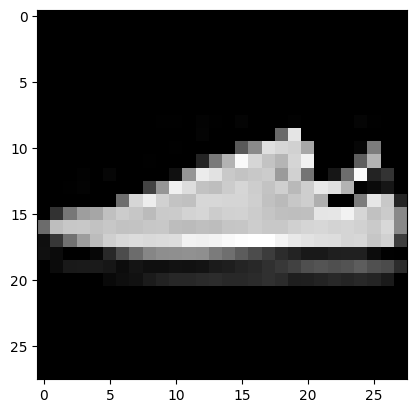

7


In [ ]:
# print(train_images[0])
plt.imshow(train_images[6],cmap='gray')
plt.show()
print(train_labels[6])

In [ ]:
values, counts = np.unique(train_labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


class_labels=[0 T-shirt
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
]

In [ ]:
#Normalize the input
train_images,test_images=train_images/255.0,test_images/255.0


In [ ]:
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

Convolutional Neural Network

In [ ]:
#Building the model
model=models.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#Output layer--->Loss
# Dense(10)---->SparseCategoricalCrossentropy(from_logits=True)
# Dense(10, softmax)---->SparseCategoricalCrossentropy()
# Dense(1, sigmoid)---->binary_crossentropy

In [ ]:
!nvidia-smi

Sat Dec 27 02:15:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   76C    P0             33W /   70W |     106MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
history=model.fit(train_images,
                  train_labels,
                  epochs=10,
              #     callbacks=[
              # EarlyStopping(
              # monitor='val_loss',
              # patience=2,
              # restore_best_weights=True)],
                validation_data=(test_images,test_labels),
                  verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9738 - loss: 0.0701 - val_accuracy: 0.8989 - val_loss: 0.5765
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9745 - loss: 0.0690 - val_accuracy: 0.9002 - val_loss: 0.5698
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9769 - loss: 0.0602 - val_accuracy: 0.8957 - val_loss: 0.6233
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9760 - loss: 0.0644 - val_accuracy: 0.8956 - val_loss: 0.7206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9768 - loss: 0.0650 - val_accuracy: 0.8993 - val_loss: 0.6884
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9786 - loss: 0.0566 - val_accuracy: 0.9037 - val_loss: 0.6605
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9804 - loss: 0.0517 - val_accuracy: 0.9004 - val_loss: 0.6862
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9798 - loss: 0.0560 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy is ', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8987 - loss: 0.7504
Test accuracy is  0.8986999988555908


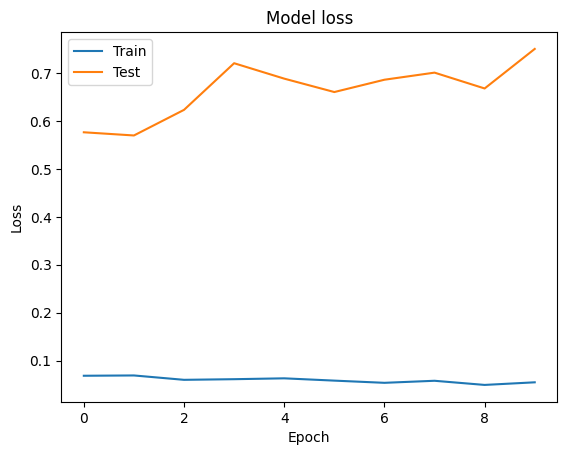

In [ ]:
#Plotting graphs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

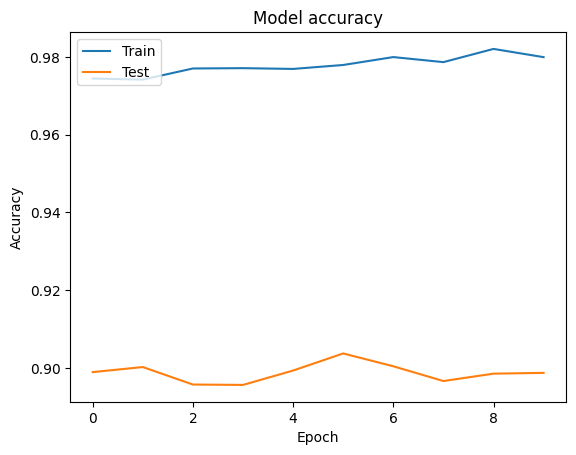

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
model.save('trained_fashion_mnist_model_by_AnkitVS.h5')

In [1]:
!git clone "https://github.com/AnkitVS0702/Fashion-MNIST-Classifier"

Cloning into 'Fashion-MNIST-Classifier'...


In [2]:
pwd

'/content'

In [3]:
!find /content/drive -name "Fashion_MNIST_model_training.ipynb"

/content/drive/MyDrive/Colab Notebooks/Fashion_MNIST_model_training.ipynb


In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/Fashion_MNIST_model_training.ipynb" ""